In [9]:
# import stuff
import pandas as p
import numpy as n
import seaborn as s
from matplotlib import pyplot as plt

# Data Set 1; Pokemon :)

This is the data set of all Pokemon as of 10/1/21

[csv link](https://www.kaggle.com/hamdallak/the-world-of-pokemons?select=pokemons+dataset.csv)

## Useful Stats:
- Size of set ~> 1045
- Columns ~> 11

In [10]:
pokemon = p.read_csv('data/pokemon.csv', header = None, 
                     skiprows=1, encoding = 'latin-1', low_memory = False,
                    names = ['Name', 'Version', 'Primary Type' ,'Secondary Type', 'Attack', 'Defense' , 'HP', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total']
)
p.set_option('display.max_rows', 18)

In [11]:
pokemon

,Name,Version,Primary Type,Secondary Type,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...,...
1040,Glastrier,NaN,ICE,NaN,145,130,100,65,110,30,580
1041,Spectrier,NaN,GHOST,NaN,65,60,100,145,80,130,580
1042,Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500
1043,Calyrex,Ice Rider,PSYCHIC,ICE,165,150,100,85,130,50,680


A) The population we are sampling is the statistics of all pokemon.

B) The features being measured include name, version, types, and battle stats.

C) All features are discrete as well as:

### Qualitative and Nominal:

   - Name
   - Version
   - Primary Type
   - Secondary Type

### Quantitative and Ordinal:

   - Attack
   - Defense
   - HP
   - Sp. Attack
   - Sp. Defense
   - Speed
   - Total

D) The features version, and Second Type have null values for some pokemon. These are still usefull because not all pokemon need to have a different version and second type. This also implies incompleteness.

E) It's needed to include the pokemon with different versions and those with second types. Otherwise it would not be all the pokemon.

F) Some features that could be added are the weaknesses of each pokemon and whether the pokemon evolves. If the pokemon does evolve then what level it evolves at.

In [12]:
# G) A good example of a pivot that works, but is ridiculous.
uni_poke = p.DataFrame()
unique = pokemon['Name'][pokemon['Version'].isnull()]
type_ = pokemon[['Primary Type']]
total = pokemon[['Total']]

uni_poke['Name'] = unique
uni_poke['Type'] = type_
uni_poke['total'] = total

uni_poke.reset_index()
uni_poke.pivot(index = 'Name', columns = 'Type', values = 'total')

Type,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
Name,,,,,,,,,,,,,,,,,,
Abomasnow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.0,NaN,NaN,NaN
Absol,NaN,465.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accelgor,495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aerodactyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,515.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zigzagoon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,NaN,NaN,NaN,NaN,NaN
Zoroark,NaN,510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zorua,NaN,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# An example of a more sensible pivot, but quite costly time wise

# This gets all the unique types
type_stats = p.DataFrame()
type_stats[['Primary Type','Secondary Type']] = pokemon[['Primary Type','Secondary Type']].drop_duplicates(['Primary Type', 'Secondary Type'])
type_stats = type_stats.sort_values('Primary Type').reset_index()
type_stats[['Mean Total']] = 0.0
#print(test)

# Gets the mean total values for each of the unique relevant type combos
# This operation costs >200k iterations...MPI :)
for i in range(0,len(type_stats)):
    sum_total = 0
    mean_total = 1
    count = 0
    actual_type = type_stats[['Primary Type', 'Secondary Type']].loc[i]
    for j in range(0,len(pokemon)):
        str1 = pokemon[['Primary Type', 'Secondary Type']].loc[j].to_string()
        str2 = actual_type.to_string()
        
        if(str1 == str2):
            count += 1
            sum_total += pokemon[['Total']].loc[j].astype(int)
            
    mean_total = sum_total.astype(float) / count
    type_stats.at[i,'Mean Total']= mean_total[0]
    
    
print(type_stats)

     index Primary Type Secondary Type  Mean Total
0      263          BUG       FIGHTING  560.000000
1      252          BUG          STEEL  509.714286
2      870          BUG          FAIRY  384.000000
3      262          BUG           ROCK  438.333333
4       59          BUG          GRASS  384.000000
..     ...          ...            ...         ...
187    272        WATER           ROCK  446.000000
188    215        WATER       ELECTRIC  395.000000
189    229        WATER          FAIRY  442.500000
190    103        WATER        PSYCHIC  480.000000
191    240        WATER         GROUND  433.900000

[192 rows x 4 columns]


In [14]:
#prints out the strongest type combos in ascending order
print(type_stats.sort_values('Mean Total').reset_index())

#Here is the more "sensible" pivot
type_stats.pivot(index = 'Primary Type', columns = 'Secondary Type', values = 'Mean Total').sort_values('Primary Type').round(2)

     level_0  index Primary Type Secondary Type  Mean Total
0          7    351          BUG          GHOST  236.000000
1         11     13          BUG            NaN  287.631579
2        116   1009          ICE            BUG  330.000000
3        132    539       POISON            BUG  330.000000
4        124     52       NORMAL          FAIRY  330.000000
..       ...    ...          ...            ...         ...
187       28    754       DRAGON            ICE  686.666667
188      129    806       POISON         DRAGON  712.250000
189       52   1028        FAIRY          STEEL  720.000000
190      142    936      PSYCHIC         DRAGON  754.000000
191      108    462       GROUND           FIRE  770.000000

[192 rows x 5 columns]


Secondary Type,NaN,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
Primary Type,,,,,,,,,,,,,,,,,,,
BUG,287.63,NaN,NaN,NaN,422.75,384.00,560.00,455.00,422.36,236.00,384.00,345.00,NaN,NaN,348.75,420.00,438.33,509.71,343.00
DARK,413.71,NaN,NaN,472.50,NaN,381.67,418.00,476.67,508.33,430.00,600.00,NaN,470.00,369.2,NaN,385.00,NaN,415.00,NaN
DRAGON,417.46,NaN,NaN,NaN,680.00,590.00,510.00,680.00,641.67,426.67,NaN,543.43,686.67,NaN,NaN,650.00,NaN,NaN,NaN
ELECTRIC,427.97,NaN,436.00,557.50,NaN,500.50,NaN,520.00,527.33,440.00,520.00,NaN,512.50,385.0,415.33,485.00,NaN,440.00,520.00
FAIRY,420.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.00,NaN
FIGHTING,411.24,NaN,522.50,NaN,NaN,NaN,NaN,NaN,540.00,600.00,NaN,NaN,478.00,NaN,NaN,400.00,NaN,623.33,550.00
FIRE,410.65,415.0,530.00,559.50,NaN,NaN,492.86,NaN,540.71,497.50,NaN,441.67,NaN,438.0,NaN,537.00,430.00,600.00,600.00
FLYING,442.50,NaN,NaN,390.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495.00,475.00
GHOST,440.80,NaN,485.00,680.00,NaN,476.00,NaN,388.33,440.67,NaN,419.64,400.00,NaN,NaN,453.75,NaN,NaN,NaN,NaN


This finds the mean stat total value of each type combination for all pokemon. Although not a perfect pivot, you could use this for visualzation to determine what type combos are statistically best. Due to the large amount of data points, a good way to plot this would be to use a scatter plot and just highlight the top 3 and bottom 3 type combos. 

H) i. We can do a similar method to what we used above with finding the mean total stats, but use only primary types. This is because 18 values are much easier to present than 192. 

In [15]:
#print the stats of the primary types
prime_stats = pokemon.groupby('Primary Type')[['Primary Type','Total']].mean().sort_values('Total')['Total']
prime_stats

Primary Type
BUG         384.617284
NORMAL      404.869565
GRASS       418.241758
GROUND      431.146341
WATER       431.738806
ICE         433.897436
DARK        434.543478
POISON      435.512195
FAIRY       439.272727
FLYING      440.000000
GHOST       444.071429
FIGHTING    446.404762
ROCK        448.683333
ELECTRIC    451.435484
FIRE        455.015385
STEEL       480.361111
PSYCHIC     489.354430
DRAGON      536.365854
Name: Total, dtype: float64

[Text(0.5, 1.0, 'Mean Total of Primary Stats')]

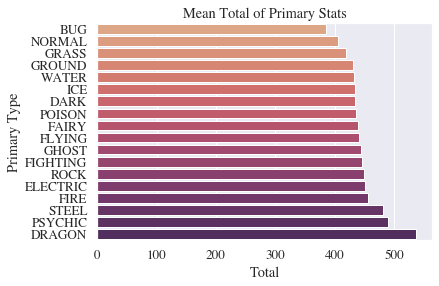

In [ ]:
#plot them!
s.set_theme(font_scale=1.2, font='Times')
prime_plot = s.barplot(x=prime_stats, y=prime_stats.keys(), orient="h", palette='flare')
prime_plot.set(xlabel='Total')
prime_plot.set(ylabel='Primary Type')
prime_plot.set(title='Mean Total of Primary Stats')

H) ii. Some statistical techniques that we can use with this data is we can make the claim that in general, **Dragon** type pokemon tend to have the best overall stats. So higher stats tend to correlate with **Dragon** types and lower stats correlate with **Bug** types. This method has a major flaw however. **Raw** stats don't mean everything because when you take into account weaknesses and movesets, (i.e. what we mentioned in iii) **Fairy** types render **Dragon** useless because of the weaknesses of **Dragon**. A linear regression line wouldn't make sense because you would have to compare specific stat totals with the overall stat total, and there is not really much correlation there besides maybe the higher the individual stat, the higher the total. 

H) iii. Yes, because raw statistics don't mean the entire picture. There are weaknesses and movesets that are arguably much more valuable than seeing just raw stats. For example, the "strongest" type is **Dragon**. However, the type **Fairy** is immune to all dragon type attacks and deal double damage. So just because Dragon has on average the highest stats, it doesn't mean is is by default the best type. However, you could modify the data set to a certain attribute such as speed or attack to determine what type on average has the best certain stat. That could potentailly help you build a certain type of team if you take into account weaknesses and other variables. 

I) We could use this data to determine how important raw stats are to building a team. Using the means calculated, we could see what type of correlation the most "popular" types have with statistical measures and if they are really as important as they may seem.  